# MuSCAT2 transit analysis template

This template shows the steps for a basic transit analysis using WASP-43b light curve observed on 18.2.2018 as an example.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pathlib import Path
from corner import corner

from muscat2ta.transitanalysis import TransitAnalysis

droot = Path('data').resolve()

## Initialisation

In [3]:
target = tdir = 'wasp-43b'
night = '180218'

In [ ]:
ta = TransitAnalysis(droot.joinpath(tdir, night), target, night, 0, [1,2,3], etime=15, model='pb_independent_k')

In [5]:
ta.optimize_comparison_stars(n_stars=3)

Optimising comparison stars: 100%|██████████| 3/3 [00:01<00:00,  2.13it/s]


## Linear baseline model

In [6]:
ta.optimize('linear', 500)

Optimizing linear model: 100%|██████████| 500/500 [00:25<00:00, 19.24it/s]


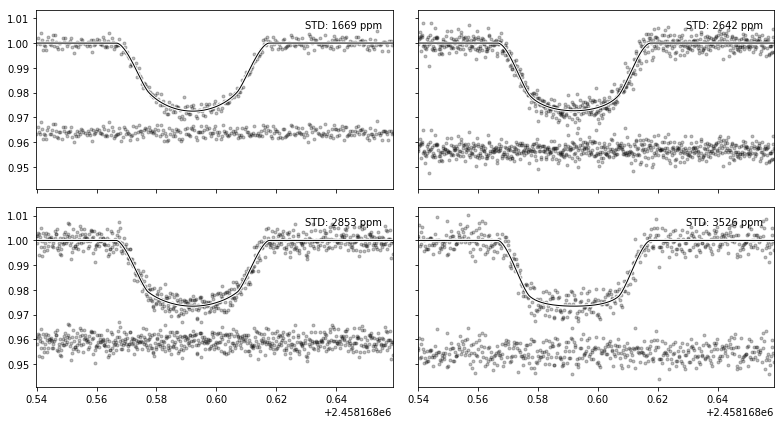

In [8]:
ta.plot_light_curve(detrend_obs=True);

In [9]:
ta.learn_gp_hyperparameters(joint_fit=False)

Optimizing GP hyperparameters: 100%|██████████| 4/4 [00:21<00:00,  4.62s/it]


In [10]:
ta.optimize('gp', 500)

Optimizing GP model:  76%|███████▌  | 380/500 [01:18<00:22,  5.45it/s]


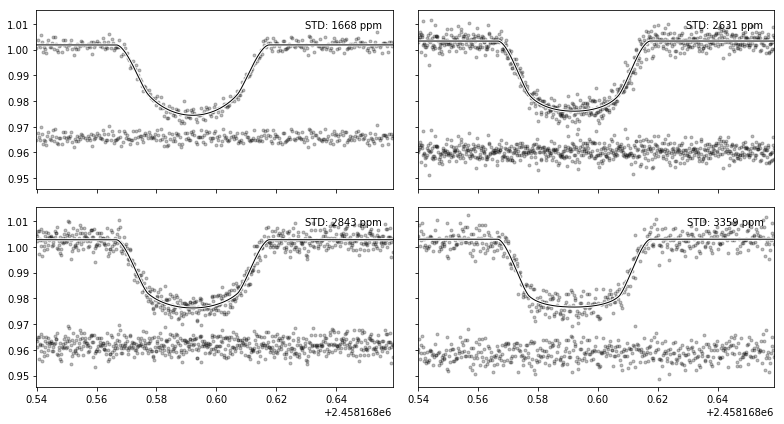

In [11]:
ta.plot_light_curve('gp', 'de', detrend_obs=True);

In [12]:
ta.sample('gp', 500, thin=10)
ta.sample('gp', 500, thin=10, reset=True)

Sampling linear model: 100%|██████████| 500/500 [01:05<00:00,  8.59it/s]


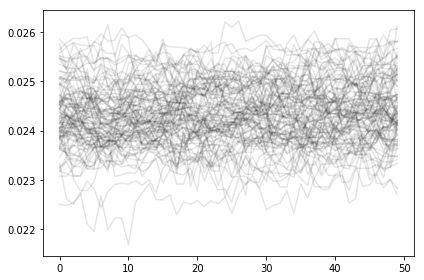

In [18]:
ta.plot_mcmc_chains(4);

In [19]:
df = pd.DataFrame(ta.gplpf.sampler.chain[:,:,:9].copy().reshape([-1,9]), columns=ta.gplpf.ps.names[:9])
df['k'] = sqrt(df['k2'])
df.drop('k2', axis=1, inplace=True)

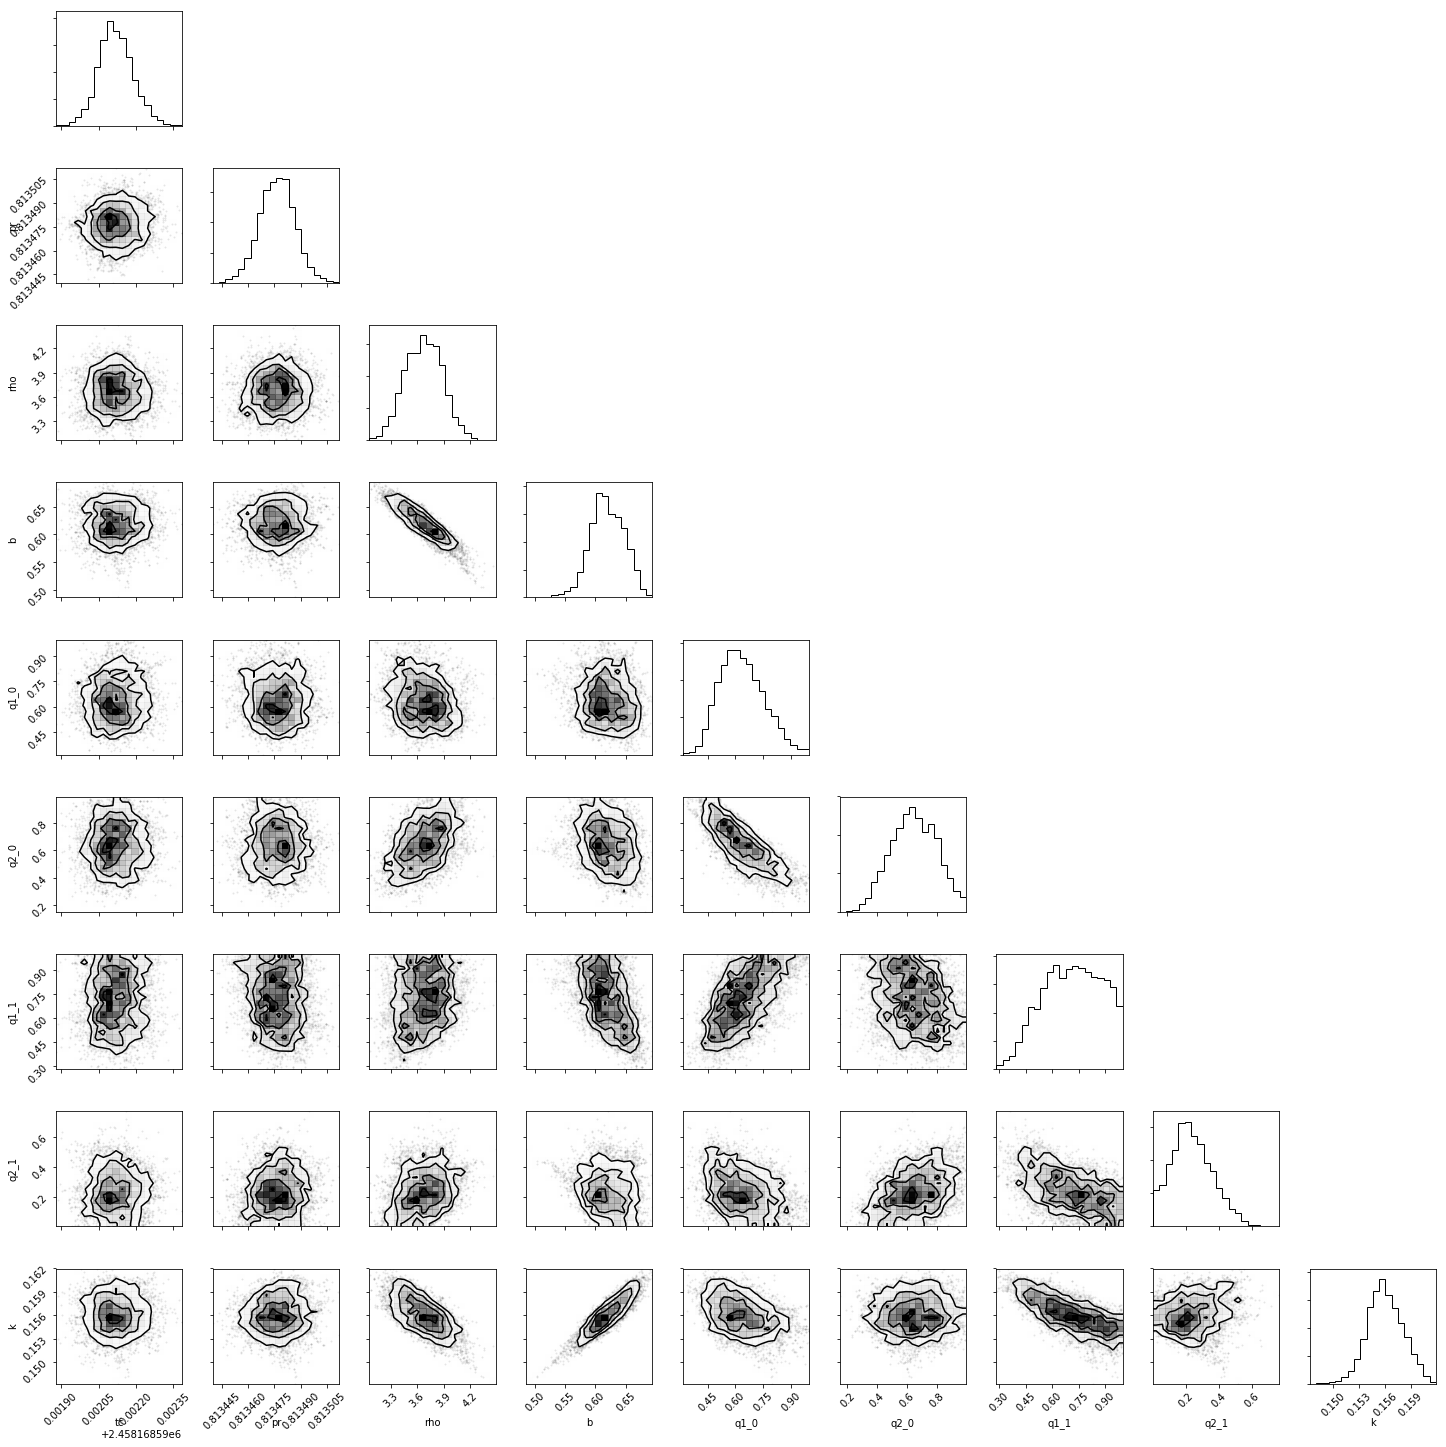

In [20]:
corner(df);

In [15]:
ta.save()
ta.save_fits('linear', npoly=0)
ta.save_fits('gp', npoly=0)

---

<center> &copy; 2018 Hannu Parviainen </center>